<a href="https://colab.research.google.com/github/EgorSolovei/ML-in-nuclear-physics/blob/main/GBDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

In [ ]:
data = pd.read_csv('data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data = data.rename(columns={"class": "class_param"})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2.0,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
 # где-то плохая обработка, потому что классов только 4. Уберём плохие
data['class_param'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [ ]:
data.class_param.fillna(0, inplace=True)
data = data.query('class_param != 0')
data['class_param'].unique()

array([2., 4., 1., 3.])

In [ ]:
data = data.astype({'class_param': 'int'})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

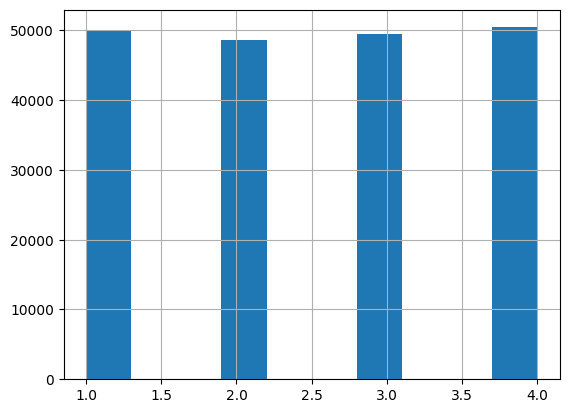

In [ ]:
data.class_param.hist()

In [ ]:
data.shape

(198649, 193)

# Models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = data['class_param']
X = data.drop(columns='class_param')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139054, 192), (59595, 192), (139054,), (59595,))

## XGBoost